# Image처리

image 로드

In [1]:
import cv2
import numpy as np

#이미지 로드
img = cv2.imread('images/2.jpg', cv2.IMREAD_COLOR) #이미지를 컬러로 읽어들임
# img = cv2.imread('images/2.jpg', cv2.IMREAD_GRAYSCALE) #이미지를 그레이스케일로 읽어들임

img = cv2.pyrDown(img) # 사이즈 절반으로 줄이기.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # img2를 그레이로 변경

cv2.imshow("color",img)#별도 창에 image가 뜬다.
cv2.imshow("gray",img_gray)

cv2.waitKey(0)
cv2.destroyAllWindows()

image 이동(1)

In [1]:
import cv2
import numpy as np

#이미지 로드
img = cv2.imread('images/2.jpg', cv2.IMREAD_COLOR) #이미지를 컬러로 읽어드림
img = cv2.pyrDown(img) # 사이즈 절반으로 줄이기. 두번 입력하면 더 작아짐
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # img2를 그레이로 변경

# 이미지가 저장된 넘파이 배열의 너비와 높이를 구합니다
height,width = img.shape[:2]

print(img.shape, img2.shape) # 이미지의 사이즈
print(img.ndim, img2.ndim) # 3차원, 몇차원인지 확인 / 흑백은 2차원 / 사진이 흑백인지 컬러인지 알기 위해선 ndim을 사용한다. 3이면 컬러, 2면 흑백

# 이동변환행렬을 생성합니다. x방향으로 100픽셀, y방향으로 200픽셀 이동합니다.
M = np.array([[1, 0, 100], [0, 1, 200], [0, 0, 1]], dtype = float)

# 결과 이미지를 저장할 넘파이 배열을 입력 이미지와 같은 크기로 생성합니다.
dst = np.zeros(img.shape, dtype = np.uint8)

#이미지의 전체 픽셀을 스캔합니다.
for y in range(height-1):
    for x in range(width-1):

        #현재 픽셀 p의 좌표에 이동 변환 행렬 M을 곱하여 이동시킨 좌표 p_를 구합니다.
        p = np.array([x,y,1])
        p_ = np.dot(M,p)

        # 이동한 위치인 p_ 에서 좌표 x_,y_를 정수 형태로 가져옵니다.
        x_,y_ = p_[:2]
        x_ = int(x_)
        y_ = int(y_)

        # 입력 이미지 크기 내로 픽셀이 이동한 경우에만 결과 이미지를 저장할 넘파이 배열로 픽셀을 복사합니다.
        if x_ > 0 and x_ < width and y_ > 0 and y_ < height:
            dst[y_, x_] = img[y,x]

# 입력 이미지와 결과 이미지를 수평으로 연결하여 하나의 이미지로 만듭니다.
result = cv2.hconcat([img, dst])

# cv2.imshow("image",img)
# cv2.imshow("iamge2",img2)


cv2.imshow("image",result)#별도 창에 image가 뜬다.

cv2.waitKey(0)
cv2.destroyAllWindows()



(360, 640, 3) (360, 640)
3 2


image 이동(2)

In [31]:
import cv2
import numpy as np

#이미지 로드
img = cv2.imread('images/2.jpg', cv2.IMREAD_COLOR) #이미지를 컬러로 읽어드림
img = cv2.pyrDown(img) # 사이즈 절반으로 줄이기. 두번 입력하면 더 작아짐
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # img2를 그레이로 변경

# 이미지가 저장된 넘파이 배열의 너비와 높이를 구합니다
height,width = img.shape[:2]

print(img.shape, img2.shape) # 이미지의 사이즈
print(img.ndim, img2.ndim) # 3차원, 몇차원인지 확인 / 흑백은 2차원 / 사진이 흑백인지 컬러인지 알기 위해선 ndim을 사용한다. 3이면 컬러, 2면 흑백

# 이동변환행렬을 생성합니다. x방향으로 100픽셀, y방향으로 200픽셀 이동합니다.

# M = np.float32([[1, 0, 100], [0, 1, 200]]) #아래랑 같은 표현
M = np.array([[1, 0, 100], [0, 1, 200]], dtype=float)#위랑 같은 표현


dst = cv2.warpAffine(img, M, (width, height))

# 입력 이미지와 결과 이미지를 수평으로 연결하여 하나의 이미지로 만듭니다.
result = cv2.hconcat([img, dst])

# cv2.imshow("image",img)
# cv2.imshow("iamge2",img2)


cv2.imshow("image",result)

cv2.waitKey(0)
cv2.destroyAllWindows()


(360, 640, 3) (360, 640)
3 2


image 회전

In [34]:
import cv2
import numpy as np

#이미지 로드
img = cv2.imread('images/2.jpg', cv2.IMREAD_COLOR) #이미지를 컬러로 읽어드림
img = cv2.pyrDown(img) # 사이즈 절반으로 줄이기. 두번 입력하면 더 작아짐
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # img2를 그레이로 변경

# 이미지가 저장된 넘파이 배열의 너비와 높이를 구합니다
height,width = img.shape[:2]

angle = 45
# center=(0,0)
# center=(height/2,width/2)
center=(width/2,height/2)

rotation_matrix =cv2.getRotationMatrix2D(center, angle, 1)

dst = cv2.warpAffine(img, rotation_matrix, (width, height))

# 입력 이미지와 결과 이미지를 수평으로 연결하여 하나의 이미지로 만듭니다.
result = cv2.hconcat([img, dst])

# cv2.imshow("image",img)
# cv2.imshow("iamge2",img2)


cv2.imshow("image",result)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np


img = cv2.imread('images/2.jpg',cv2.IMREAD_COLOR)
height,width = img.shape[:2]


scale_factor = 0.5
scaling_matrix = np.array([[scale_factor, 0, 0], [0, scale_factor, 0], [0, 0, 1]])
translation_matrix = np.array([[1, 0, width/4], [0, 1, height/4], [0, 0, 1]])
angle = 45
radian = angle*np.pi/180
c = np.cos(radian)
s = np.sin(radian)
center_x = width / 2
center_y = height / 2
rotation_matrix = np.array([[c, s, (1-c)*center_x-s*center_y], [-s, c, s*center_x+(1-c)*center_y], [0, 0, 1]])

# 정해진 순서대로 변환 행렬을 곱하여 하나의 행렬을 생성합니다. 
T = np.eye(3)
T = np.dot(scaling_matrix, T)
T = np.dot(translation_matrix, T)
T = np.dot(rotation_matrix, T)

dst = np.zeros((height, width, img.shape[2]) , dtype=np.uint8)

for y in range(height):
    for x in range(width):

             # 미리 구해놓은 변환행렬을 행렬곱 한번으로 적용합니다. 
             # 여기에서도 backward mapping을 사용합니다. 
        new_p = np.array([x, y, 1])
        inv_scaling_matrix = np.linalg.inv(T)
        old_p = np.dot(inv_scaling_matrix, new_p)

        x_,y_ = old_p[:2]
        x_ = int(x_)
        y_ = int(y_)

        if x_ > 0 and x_ < width and y_ > 0 and y_ < height:
            dst.itemset((y, x, 0), img.item(y_, x_, 0))
            dst.itemset((y, x, 1), img.item(y_, x_, 1))
            dst.itemset((y, x, 2), img.item(y_, x_, 2))

cv2.imshow("result", dst)
cv2.waitKey(0)

-1

image 사이즈 변경

In [39]:
import cv2
import numpy as np

#이미지 로드
img = cv2.imread('images/2.jpg', cv2.IMREAD_COLOR) #이미지를 컬러로 읽어드림
img = cv2.pyrDown(img) # 사이즈 절반으로 줄이기. 두번 입력하면 더 작아짐

# 이미지가 저장된 넘파이 배열의 너비와 높이를 구합니다
height,width = img.shape[:2]
dst = cv2.resize(img, (int(width*1.5), int(height*1.5)))



cv2.imshow("image",dst)

cv2.waitKey(0)
cv2.destroyAllWindows()


image 펴기(1)

In [2]:
import cv2
import numpy as np


# 클릭한 횟수를 저장합니다.
count_mouse_click = 0

# 호모그래피 행렬을 곱해서 결과를 계산중이면 1을 갖게됩니다.
# 계산중에 마우스 클릭은 무시하기 위해서 사용됩니다. 
caculate_start = 0

# 마우스 클릭한 위치를 저장할 리스트입니다. 
pointX = []
pointY = []


# OpenCV 창에 보이는 이미지를 클릭시, 클릭한 위치(x,y)를 파라미터로 호출되는 콜백함수입니다.   
def CallBackFunc(event, x, y, flags, userdata):
    global count_mouse_click, caculate_start

    # 마우스 왼쪽 버튼을 클릭했는지 체크합니다.
    if event == cv2.EVENT_LBUTTONDOWN:
        print("{} - ({}, {} )".format(count_mouse_click, x, y))

        # 마우스 클릭한 위치를 저장합니다.
        pointX.append(x)
        pointY.append(y)

        # 마우스 클릭한 횟수를 업데이트합니다.
        count_mouse_click += 1

        # 마우스 클릭한 위치를 화면에 보여줄 때 사용하기 위해 입력 이미지를 복사합니다.  
        img_temp = img_gray.copy()

        # 마우스 클릭한 위치에 원을 그립니다. 
        for point in zip(pointX, pointY):
            cv2.circle(img_temp, point, 5, (0), 2 )

        # 마우스 클릭할때마다 원이 이미지에 보이게 됩니다.  
        cv2.imshow("gray image", img_temp)


    # 4점을 모두 클릭한 상태이고 아직 결과 이미지를 처리하기 전이면 
    if count_mouse_click == 4 and caculate_start == 0:
    
        # 이제 결과 이미지 처리중임을 알립니다. 
        caculate_start = 1;

        print("calculate H")

        # 클릭한 사각 영역좌표를 기반으로 정면에서 바라본 직사각형 영역을 계산합니다. 
        width = ((pointX[1] - pointX[0]) + (pointX[3] - pointX[2]))*0.5;
        height = ((pointY[2] - pointY[0]) + (pointY[3] - pointY[1]))*0.5;

        newpointX = np.array([pointX[3] - width, pointX[3], pointX[3] - width, pointX[3]])
        newpointY = np.array([pointY[3] - height, pointY[3] - height, pointY[3], pointY[3]])

        # 계산한 직사각형 영역을 화면에 출력합니다. 
        for i in range(4):
            print("({}, {})".format(newpointX[i], newpointY[i]))


        # 마우스로 클릭한 좌표와 계산된 좌표를 넘파이 배열로 변환합니다. 
        pts_src = []
        pts_dst = []

        for i in range(4):
            pts_src.append((pointX[i], pointY[i]))
            pts_dst.append((newpointX[i], newpointY[i]))

        pts_src = np.array(pts_src)
        pts_dst = np.array(pts_dst)


        # 호모그래피 행렬을 구합니다. 
        A = np.array([
            [ -1 * pointX[0], -1 * pointY[0], -1, 0, 0, 0,     pointX[0] * newpointX[0], pointY[0] * newpointX[0], newpointX[0] ],
            [ 0, 0, 0, -1 * pointX[0], -1 * pointY[0], -1,   pointX[0] * newpointY[0], pointY[0] * newpointY[0], newpointY[0] ],
            [ -1 * pointX[1], -1 * pointY[1], -1, 0, 0, 0,pointX[1] * newpointX[1], pointY[1] * newpointX[1], newpointX[1] ],
            [ 0, 0, 0, -1 * pointX[1], -1 * pointY[1], -1,pointX[1] * newpointY[1], pointY[1] * newpointY[1], newpointY[1] ],
            [ -1 * pointX[2], -1 * pointY[2], -1, 0, 0, 0,pointX[2] * newpointX[2], pointY[2] * newpointX[2], newpointX[2] ],
            [ 0, 0, 0, -1 * pointX[2], -1 * pointY[2], -1,pointX[2] * newpointY[2], pointY[2] * newpointY[2], newpointY[2] ],
            [ -1 * pointX[3], -1 * pointY[3], -1, 0, 0, 0,pointX[3] * newpointX[3], pointY[3] * newpointX[3], newpointX[3] ],
            [ 0, 0, 0, -1 * pointX[3], -1 * pointY[3], -1,pointX[3] * newpointY[3], pointY[3] * newpointY[3], newpointY[3] ]])


        u, s, v = np.linalg.svd(A, full_matrices=True)
        v = v.T

        # v의 마지막 컬럼값을 H로 취합니다. 
        temp = v[:,8]
        h = temp.reshape(3,3)

        # h_33을 1로 만듭니다. 
        h = h / h[2,2]


        img_result = np.zeros(img_gray.shape, dtype=np.uint8)

        height, width = img_gray.shape[:2]
        for y in range(height):
            for x in range(width):

                oldpoint = np.array([x, y, 1])
                newpoint = np.dot(h, oldpoint)

                newX = int(newpoint[0]/newpoint[2])
                newY = int(newpoint[1]/newpoint[2])

                if newX > 0 and newY > 0 and newX < width and newY < height:
                    img_result.itemset(newY, newX, img_gray.item(y, x))

        result = cv2.hconcat([img_gray, img_result]) 
        cv2.imshow("result", result)
        cv2.waitKey(0)

# 호모그래피 행렬을 저장할 입력 이미지를 로드합니다. 
img_gray = cv2.imread("images/keyboard2.jpg", cv2.IMREAD_GRAYSCALE)

# 타이틀바에 “gray image”를 출력하는 창에 넘파이 배열 img_gray를 보여줍니다. 
cv2.imshow("gray image", img_gray)

# 타이틀바에 “gray image”를 출력하는 창을 위해 마우스 콜백 함수를 지정합니다. 
cv2.setMouseCallback("gray image", CallBackFunc)

print("left up, right up, left down, right down")

cv2.waitKey(0)

left up, right up, left down, right down


-1

image 펴기2

In [ ]:
import cv2
import numpy as np


# 클릭한 횟수를 저장합니다.
count_mouse_click = 0

# 호모그래피 행렬을 곱해서 결과를 계산중이면 1을 갖게됩니다.
# 계산중에 마우스 클릭은 무시하기 위해서 사용됩니다. 
caculate_start = 0

# 마우스 클릭한 위치를 저장할 리스트입니다. 
pointX = []
pointY = []


# OpenCV 창에 보이는 이미지를 클릭시, 클릭한 위치(x,y)를 파라미터로 호출되는 콜백함수입니다.   
def CallBackFunc(event, x, y, flags, userdata):
    global count_mouse_click, caculate_start

    # 마우스 왼쪽 버튼을 클릭했는지 체크합니다.
    if event == cv2.EVENT_LBUTTONDOWN:
        print("{} - ({}, {} )".format(count_mouse_click, x, y))

        # 마우스 클릭한 위치를 저장합니다.
        pointX.append(x)
        pointY.append(y)

        # 마우스 클릭한 횟수를 업데이트합니다.
        count_mouse_click += 1

        # 마우스 클릭한 위치를 화면에 보여줄 때 사용하기 위해 입력 이미지를 복사합니다.  
        img_temp = img_gray.copy()

        # 마우스 클릭한 위치에 원을 그립니다. 
        for point in zip(pointX, pointY):
            cv2.circle(img_temp, point, 5, (0), 2 )

        # 마우스 클릭할때마다 원이 이미지에 보이게 됩니다.  
        cv2.imshow("gray image", img_temp)


    # 4점을 모두 클릭한 상태이고 아직 결과 이미지를 처리하기 전이면 
    if count_mouse_click == 4 and caculate_start == 0:
    
        # 이제 결과 이미지 처리중임을 알립니다. 
        caculate_start = 1;

        print("calculate H")

        # 클릭한 사각 영역좌표를 기반으로 정면에서 바라본 직사각형 영역을 계산합니다. 
        width = ((pointX[1] - pointX[0]) + (pointX[3] - pointX[2]))*0.5;
        height = ((pointY[2] - pointY[0]) + (pointY[3] - pointY[1]))*0.5;

        newpointX = np.array([pointX[3] - width, pointX[3], pointX[3] - width, pointX[3]])
        newpointY = np.array([pointY[3] - height, pointY[3] - height, pointY[3], pointY[3]])

        # 계산한 직사각형 영역을 화면에 출력합니다. 
        for i in range(4):
            print("({}, {})".format(newpointX[i], newpointY[i]))


        # 마우스로 클릭한 좌표와 계산된 좌표를 넘파이 배열로 변환합니다. 
        pts_src = []
        pts_dst = []

        for i in range(4):
            pts_src.append((pointX[i], pointY[i]))
            pts_dst.append((newpointX[i], newpointY[i]))

        pts_src = np.array(pts_src)
        pts_dst = np.array(pts_dst)


        # 호모그래피 행렬을 구합니다. 
        A = np.array([
            [ -1 * pointX[0], -1 * pointY[0], -1, 0, 0, 0,     pointX[0] * newpointX[0], pointY[0] * newpointX[0], newpointX[0] ],
            [ 0, 0, 0, -1 * pointX[0], -1 * pointY[0], -1,   pointX[0] * newpointY[0], pointY[0] * newpointY[0], newpointY[0] ],
            [ -1 * pointX[1], -1 * pointY[1], -1, 0, 0, 0,pointX[1] * newpointX[1], pointY[1] * newpointX[1], newpointX[1] ],
            [ 0, 0, 0, -1 * pointX[1], -1 * pointY[1], -1,pointX[1] * newpointY[1], pointY[1] * newpointY[1], newpointY[1] ],
            [ -1 * pointX[2], -1 * pointY[2], -1, 0, 0, 0,pointX[2] * newpointX[2], pointY[2] * newpointX[2], newpointX[2] ],
            [ 0, 0, 0, -1 * pointX[2], -1 * pointY[2], -1,pointX[2] * newpointY[2], pointY[2] * newpointY[2], newpointY[2] ],
            [ -1 * pointX[3], -1 * pointY[3], -1, 0, 0, 0,pointX[3] * newpointX[3], pointY[3] * newpointX[3], newpointX[3] ],
            [ 0, 0, 0, -1 * pointX[3], -1 * pointY[3], -1,pointX[3] * newpointY[3], pointY[3] * newpointY[3], newpointY[3] ]])


        u, s, v = np.linalg.svd(A, full_matrices=True)
        v = v.T

        # v의 마지막 컬럼값을 H로 취합니다. 
        temp = v[:,8]
        h = temp.reshape(3,3)

        # h_33을 1로 만듭니다. 
        h = h / h[2,2]


        img_result = np.zeros(img_gray.shape, dtype=np.uint8)

        inv_h = np.linalg.inv(h)

        height, width = img_gray.shape[:2]
        for y in range(height):
            for x in range(width):

                # 변환 후 좌표를 기준으로 원본 이미지상의 좌표 계산
                newpoint = np.array([x, y, 1])
                oldpoint = np.dot(inv_h, newpoint)

                oldX = int(oldpoint[0]/oldpoint[2])
                oldY = int(oldpoint[1]/oldpoint[2])

                # 원본 이미지의 좌표상의 픽셀을 현재 위치로 가져옴
                if oldX > 0 and oldY > 0 and oldX < width and oldY < height:
                    img_result.itemset(y, x, img_gray.item(oldY, oldX))


        result = cv2.hconcat([img_gray, img_result]) 
        cv2.imshow("result", result)
        cv2.waitKey(0)

# 호모그래피 행렬을 저장할 입력 이미지를 로드합니다. 
img_gray = cv2.imread("images/keyboard2.jpg", cv2.IMREAD_GRAYSCALE)

# 타이틀바에 “gray image”를 출력하는 창에 넘파이 배열 img_gray를 보여줍니다. 
cv2.imshow("gray image", img_gray)

# 타이틀바에 “gray image”를 출력하는 창을 위해 마우스 콜백 함수를 지정합니다. 
cv2.setMouseCallback("gray image", CallBackFunc)

print("left up, right up, left down, right down")

cv2.waitKey(0)

image펴기3(미리 점 찍어놓기)

In [2]:
import numpy as np
import cv2


step = 0
mouse_is_pressing = False



def distanceBetweenTwoPoints(point1, point2):
    
  x1,y1 = point1
  x2,y2 = point2
 
  return int(np.sqrt(pow(x1 - x2, 2) + pow(y1 - y2, 2)))


 
def mouse_callback(event,x,y,flags,param):
    
    global mouse_is_pressing,points

    if step != 1:
      return

    if event == cv2.EVENT_MOUSEMOVE: 
        if mouse_is_pressing == True: 

          for i,point in enumerate(points):
            if distanceBetweenTwoPoints((x,y), point) < 15:
              points[i][0] = x
              points[i][1] = y
              break    
          
    elif event == cv2.EVENT_LBUTTONDOWN:
      
      for point in points:
        if distanceBetweenTwoPoints((x,y), point) < 10:
          mouse_is_pressing = True
          break

    elif event == cv2.EVENT_LBUTTONUP: 

      mouse_is_pressing = False




def angle_between(A, B):

  x1 = A[0]
  y1 = A[1]
  x2 = B[0]
  y2 = B[1]


  dot = x1*x2 + y1*y2      
  det = x1*y2 - y1*x2     
  angle = np.arctan2(det, dot) * 180/np.pi  

  return angle



def sort_points(points):

    points = points.astype(np.float32)

    new_points = np.zeros((4, 2), dtype = "float32")
 

    s = points.sum(axis = 1)
    min_index = np.argmin(s)
    new_points[0] = points[min_index]
    points = np.delete(points, min_index, axis = 0)



    s = points.sum(axis = 1)
    max_index = np.argmax(s)
    new_points[2] = points[max_index]
    points = np.delete(points, max_index, axis = 0)

    v0 = points[0] - new_points[0]
    v1 = points[1] - new_points[0]

    angle = angle_between(v0, v1)

    if angle < 0:
        new_points[1] = points[1]
        new_points[3] = points[0]
    else:
        new_points[1] = points[0]
        new_points[3] = points[1]
 
    return new_points



def transform(img_input, points):

    points = sort_points(points)
    topLeft, topRight, bottomRight, bottomLeft = points
    print(topLeft, topRight, bottomRight, bottomLeft)
    print(topLeft[0] + topLeft[1], topRight[0]+topRight[1],
     bottomRight[0]+bottomRight[1], bottomLeft[0]+bottomLeft[1])
 

    topWidth = distanceBetweenTwoPoints(bottomLeft, bottomRight)
    bottomWidth = distanceBetweenTwoPoints(topLeft, topRight)
    maxWidth = max(int(topWidth), int(bottomWidth))
 
    leftHeight = distanceBetweenTwoPoints(topLeft, bottomLeft)
    rightHeight = distanceBetweenTwoPoints(topRight, bottomRight)
    maxHeight = max(int(leftHeight), int(rightHeight))
 
    
    dst = np.array([[0, 0],[maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],[0, maxHeight - 1]], dtype = "float32")
 

    H = cv2.getPerspectiveTransform(points, dst)
    img_warped = cv2.warpPerspective(img_input, H, (maxWidth, maxHeight))
 
    return img_warped



def findMaxArea(contours):
      
  max_area = -1
  max_index = -1


  for i,contour in enumerate(contours):
    area = cv2.contourArea(contour)

    x,y,w,h = cv2.boundingRect(contour)

    if (w*h)*0.4 > area:
        continue

    if w > h:
        continue

    if area > max_area:
      max_area = area
      max_index = i
  
  if max_area < 10000:
    max_index = -1

  return max_index



def process(img_input, debug):

    points = []
    height,width =img_input.shape[:2]

 
    img_mask = np.zeros(img_input.shape[:2], np.uint8)

    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    rect = (10,10,width-30,height-30)
    cv2.grabCut(img_input, img_mask, rect, bgdModel,fgdModel, 
        3, cv2.GC_INIT_WITH_RECT)

    img_mask = np.where((img_mask==2)|(img_mask==0), 0, 1).astype('uint8')
    img_grabcut = img_input*img_mask[:,:,np.newaxis]

    if debug:
      cv2.imshow('input0', img_input)
      cv2.imshow('grabCut', img_grabcut)


    img_gray = cv2.cvtColor(img_grabcut, cv2.COLOR_BGR2GRAY);
    img_canny = cv2.Canny(img_gray, 30, 90);

    if debug:
      cv2.imshow('Canny', img_canny)

 
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    img_canny = cv2.morphologyEx(img_canny, cv2.MORPH_CLOSE, kernel, 1)

    if debug:
      cv2.imshow('morphology', img_canny)



    contours, hierarchy = cv2.findContours(img_canny, cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)
    max_index = findMaxArea(contours) 
    if max_index < 0:
      return points

    max_contour = contours[max_index]


    if debug:
      img_contour = img_input.copy()
      cv2.drawContours(img_contour, [max_contour], 0, (0, 0, 255), 3)
      cv2.imshow('Contour', img_contour)


    max_contour = cv2.approxPolyDP(max_contour,0.02*cv2.arcLength(max_contour,True),True)
    hull = cv2.convexHull(max_contour)

    if debug:
      img_convexhull = img_input.copy()
      cv2.drawContours(img_convexhull, [hull], 0, (255,255,0), 5)
      cv2.imshow('convexHull', img_convexhull)


    size = len(max_contour)

    if size == 4: 
      for c in hull:
       points.append(c[0])
      points = np.array(points)

    else:  
      
      rect = cv2.minAreaRect(hull)
      box = cv2.boxPoints(rect)
      points = np.int0(box.tolist())


    found = False
    for p in points:
      if p[0] < 0 or p[0] > width-1 or p[1] < 0 or p[1] > height -1:
        found = True  
        break

    if found:
      points = np.array([[10,10], [width-11, 10], 
        [width-11, height-11], [10, height-11]])

    return points
      



img_input = cv2.imread('images/66.jpg')
height, width = img_input.shape[:2]



points = process(img_input, debug=False)



size = len(points)

if size == 4:


  cv2.namedWindow('input')
  cv2.setMouseCallback("input", mouse_callback, 0);  


  step = 1


  while True:

    img_result = img_input.copy()
    for point in points:
        cv2.circle(img_result, tuple(point), 10, (255,0,0), 3 )    
    cv2.imshow('input', img_result)

    key = cv2.waitKey(1)
    if key == 32:#스페이스바
      break


  img_final = transform(img_input, points )


  cv2.imshow('input', img_result)
  cv2.imshow('result', img_final )

else:
  cv2.imshow('input', img_input)

cv2.waitKey(0)
cv2.destroyAllWindows()

[225. 156.] [615. 236.] [570. 462.] [128. 351.]
381.0 851.0 1032.0 479.0


image 붙이기

In [2]:
import cv2

img_color = cv2.imread("images/cat on laptop.jpg", cv2.IMREAD_COLOR)
img_flip_ud = cv2.flip(img_color, 0)#이미지 상하반전
img_flip_lr = cv2.flip(img_color, 1)#이미지 좌우반전

height, width, channel = img_color.shape

result1 = cv2.vconcat([img_color, img_flip_ud])
result2 = cv2.hconcat([img_color, img_flip_lr])


cv2.namedWindow('Color')
cv2.imshow('Color', img_color)
cv2.imshow('UpDown', result1)
cv2.imshow('LeftRight', result2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

img_color = cv2.imread("images/cat on laptop.jpg", cv2.IMREAD_COLOR)
img_flip_ud = cv2.flip(img_color, 0)
img_flip_lr = cv2.flip(img_color, 1)

height, width, channel = img_color.shape

dst = np.zeros_like(img_color)
result1 = cv2.hconcat([img_flip_ud, dst])
result2 = cv2.hconcat([img_color, img_flip_lr])
result3 = cv2.vconcat([result1, result2])

cv2.namedWindow('Color')
cv2.imshow('Color', result3)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
mport cv2
import numpy as np

img_color = cv2.imread("images/cat on laptop.jpg", cv2.IMREAD_COLOR)
img_flip_ud = cv2.flip(img_color, 0)
img_flip_lr = cv2.flip(img_color, 1)

height, width, channel = img_color.shape

merge = np.zeros((height*2, width*2, channel),dtype=np.uint8)

merge[0:height, 0:width,:] = img_flip_ud
merge[height:2*height, 0:width,:] = img_color
merge[height:2*height, width:width*2,:] = img_flip_lr

cv2.namedWindow('Color')
cv2.imshow('Color', merge)

cv2.waitKey(0)
cv2.destroyAllWindows()

# image회전

In [ ]:
import cv2
import numpy as np

img_color = cv2.imread("images/cat on laptop.jpg", cv2.IMREAD_COLOR)

height, width, channel = img_color.shape
rotation_degree = 45
scale = 1 # 2는 크기 2배
matrix =cv2.getRotationMatrix2D((width/2, height/2), rotation_degree, scale)
img_rotate = cv2.warpAffine(img_color, matrix, (width, height)) #뒤에 *2는 창 크기 2배

cv2.imshow("Rotate",img_rotate)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

img_color = cv2.imread("images/cat on laptop.jpg", cv2.IMREAD_COLOR)
img_scale_up = cv2.pyrUp(img_color)

height, width, channel = img_color.shape
rotation_degree = 45
scale = 1 # 2는 크기 2배
matrix =cv2.getRotationMatrix2D((width, height), rotation_degree, scale)
img_rotate = cv2.warpAffine(img_scale_up, matrix, (width*2, height*2)) #뒤에 *2는 창 크기 2배

cv2.imshow("Rotate",img_rotate)

cv2.waitKey(0)
cv2.destroyAllWindows()

# image 사이즈 축소, 확대

In [ ]:
import cv2
import numpy as np

img_color = cv2.imread("images/cat on laptop.jpg", cv2.IMREAD_COLOR)
height, width, channel = img_color.shape

img_scale_down = cv2.pyrDown(img_color)

cv2.imshow("Color",img_color)
cv2.imshow("DownScale",img_scale_down)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

img_color = cv2.imread("images/cat on laptop.jpg", cv2.IMREAD_COLOR)
height, width, channel = img_color.shape

# img_scale_up = cv2.pyrUp(img_color,dstsize(width*2, height*2).borderType=cv2.BORDER_DEFAULT)
img_scale_up = cv2.pyrUp(img_color)


cv2.imshow("Color",img_color)
cv2.imshow("UpScale",img_scale_up)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

img_color = cv2.imread("images/cat on laptop.jpg", cv2.IMREAD_COLOR)
height, width, channel = img_color.shape

img_resize_1 = cv2.resize(img_color, dsize=(640, 480), interpolation=cv2.INTER_AREA)
img_resize_2 = cv2.resize(img_color, dsize=(0, 0), fx=0.8, fy=0.8, interpolation=cv2.INTER_LINEAR)


cv2.imshow("Color",img_color)
cv2.imshow("Resize1",img_resize_1)
cv2.imshow("Resize2",img_resize_2)

cv2.waitKey(0)
cv2.destroyAllWindows()

# image 특정부위만 gray처리

In [2]:
import cv2
import numpy as np

img_color = cv2.imread("images/cat on laptop.jpg", cv2.IMREAD_COLOR)
height, width, channel = img_color.shape
img_color = cv2.pyrUp(img_color)


img_slice = img_color[100:300, 200:500]

img_gray = cv2.cvtColor(img_slice, cv2.COLOR_BGR2GRAY)
temp = cv2.merge((img_gray,img_gray,img_gray))
img_color[100:300, 200:500] = temp


cv2.imshow("Color1",img_color)
cv2.imshow("Color2",img_slice)

cv2.waitKey(0)
cv2.destroyAllWindows()

# image gray처리

In [14]:
import cv2
import numpy as np

img_color = cv2.imread("images/cat on laptop.jpg", cv2.IMREAD_COLOR)
height, width, channel = img_color.shape

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
merge = cv2.merge((img_gray,img_gray,img_gray))
img_color = cv2.hconcat([img_color, merge])

cv2.imshow("Color",img_color)

cv2.waitKey(0)
cv2.destroyAllWindows()

(-0.5, 885.5, 552.5, -0.5)

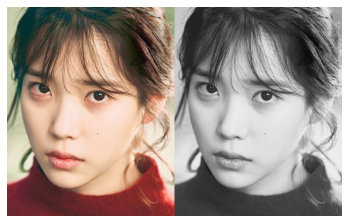

In [3]:
#그래프에 이미지 추가
import matplotlib.pyplot as plt
import cv2
import numpy as np

img_color = cv2.imread("images/iu.jpg", cv2.IMREAD_COLOR)
height, width, channel = img_color.shape

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
merge = cv2.merge((img_gray,img_gray,img_gray))
img_color = cv2.hconcat([img_color, merge])
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

plt.imshow(img_color)
plt.axis('off')

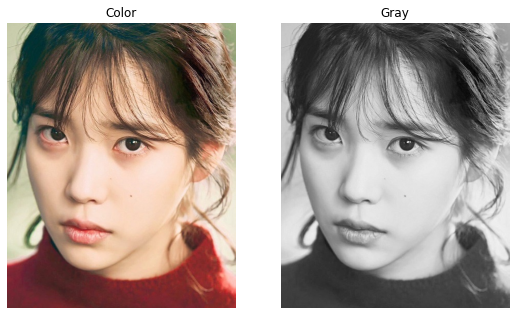

In [19]:
#subplot 방식으로 처리
import matplotlib.pyplot as plt
import cv2
import numpy as np
 
img_color = cv2.imread("images/iu.jpg", cv2.IMREAD_COLOR)
height, width, channel = img_color.shape

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
ax1.set_title('Color')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
ax2.set_title('Gray')
ax2.axis("off")
 
plt.show()

# Reverse Image

In [21]:
import cv2
import numpy as np

img_color = cv2.imread("images/iu.jpg", cv2.IMREAD_COLOR)
height, width, channel = img_color.shape

img_reverse = cv2.bitwise_not(img_color)


cv2.imshow("Color",img_color)
cv2.imshow("Reverse(bitwise not)", img_reverse)
cv2.waitKey(0)
cv2.destroyAllWindows()

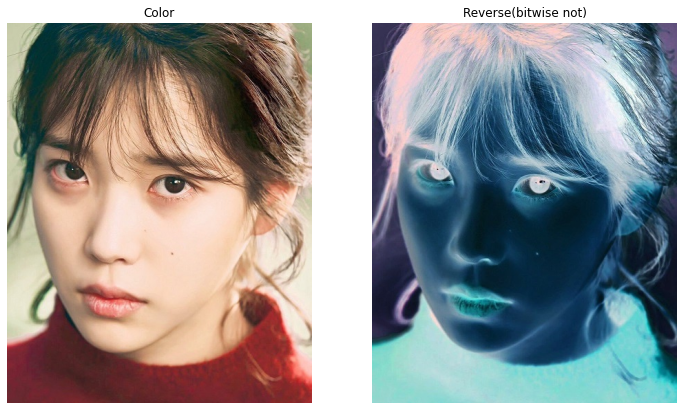

In [28]:
#subplot 방식으로 처리
import matplotlib.pyplot as plt
import cv2
import numpy as np
 
img_color = cv2.imread("images/iu.jpg", cv2.IMREAD_COLOR)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

height, width, channel = img_color.shape

img_reverse = cv2.bitwise_not(img_color)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img_color)
ax1.set_title('Color')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img_reverse)
ax2.set_title('Reverse(bitwise not)')
ax2.axis("off")
 
plt.show()

In [ ]:
##이진화(binary)

In [6]:
import cv2
import numpy as np

img_color = cv2.imread("images/iu.jpg", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
height, width, channel = img_color.shape

ret, img_binary = cv2.threshold(img_gray, 120,255,cv2.THRESH_BINARY)

cv2.imshow("Color",img_color)
cv2.imshow("Binary", img_binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

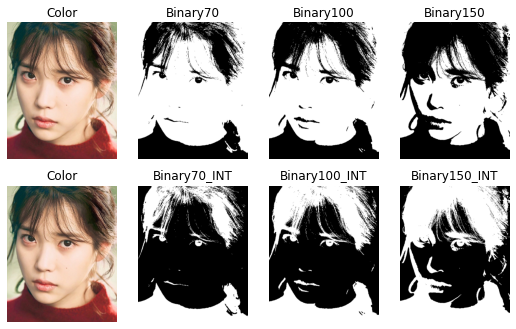

In [57]:
#subplot 방식으로 처리
import matplotlib.pyplot as plt
import cv2
import numpy as np
 
img_color = cv2.imread("images/iu.jpg", cv2.IMREAD_COLOR)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
img_gray = cv2.merge((img_gray,img_gray,img_gray))

height, width, channel = img_color.shape

ret, img_binary70 = cv2.threshold(img_gray, 70,255,cv2.THRESH_BINARY)
ret, img_binary100 = cv2.threshold(img_gray, 100,255,cv2.THRESH_BINARY)
ret, img_binary150 = cv2.threshold(img_gray, 150,255,cv2.THRESH_BINARY)
ret, img_binary70_INT = cv2.threshold(img_gray, 70,255,cv2.THRESH_BINARY_INV)
ret, img_binary100_INT = cv2.threshold(img_gray, 100,255,cv2.THRESH_BINARY_INV)
ret, img_binary150_INT = cv2.threshold(img_gray, 150,255,cv2.THRESH_BINARY_INV)


fig = plt.figure(figsize=(9,11))

ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(img_color)
ax1.set_title('Color')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(img_binary70)
ax2.set_title('Binary70')
ax2.axis("off")

ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(img_binary100)
ax3.set_title('Binary100')
ax3.axis("off")

ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(img_binary150)
ax4.set_title('Binary150')
ax4.axis("off")


ax5 = fig.add_subplot(2, 4, 5)
ax5.imshow(img_color)
ax5.set_title('Color')
ax5.axis("off")
 
ax6 = fig.add_subplot(2, 4, 6)
ax6.imshow(img_binary70_INT)
ax6.set_title('Binary70_INT')
ax6.axis("off")

ax7 = fig.add_subplot(2, 4, 7)
ax7.imshow(img_binary100_INT)
ax7.set_title('Binary100_INT')
ax7.axis("off")

ax8 = fig.add_subplot(2, 4, 8)
ax8.imshow(img_binary150_INT)
ax8.set_title('Binary150_INT')
ax8.axis("off")

plt.show()

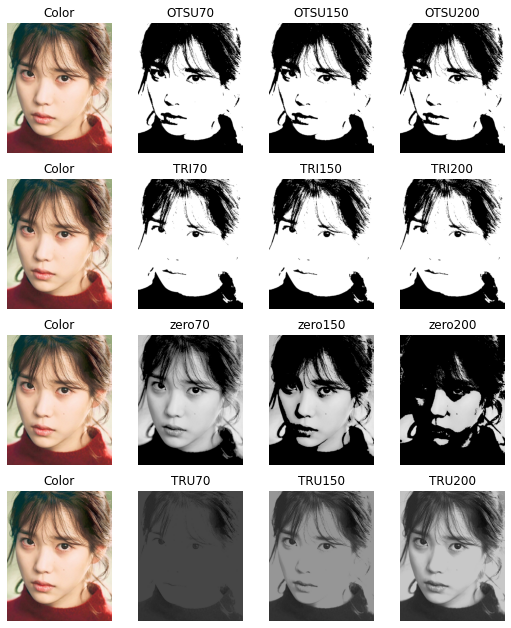

In [92]:
#subplot 방식으로 처리
import matplotlib.pyplot as plt
import cv2
import numpy as np
 
img_color = cv2.imread("images/iu.jpg", cv2.IMREAD_COLOR)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

height, width, channel = img_color.shape

ret, img_otsu70 = cv2.threshold(img_gray, 70,255,cv2.THRESH_OTSU)
img_otsu70 = cv2.merge((img_otsu70,img_otsu70,img_otsu70))

ret, img_otsu150 = cv2.threshold(img_gray, 150,255,cv2.THRESH_OTSU)
img_otsu150 = cv2.merge((img_otsu150,img_otsu150,img_otsu150))

ret, img_otsu200 = cv2.threshold(img_gray, 200,255,cv2.THRESH_OTSU)
img_otsu200 = cv2.merge((img_otsu200,img_otsu200,img_otsu200))



ret, img_TRIANGLE70 = cv2.threshold(img_gray, 70,255,cv2.THRESH_TRIANGLE)
img_TRIANGLE70 = cv2.merge((img_TRIANGLE70,img_TRIANGLE70,img_TRIANGLE70))

ret, img_TRIANGLE150 = cv2.threshold(img_gray, 150,255,cv2.THRESH_TRIANGLE)
img_TRIANGLE150 = cv2.merge((img_TRIANGLE150,img_TRIANGLE150,img_TRIANGLE150))

ret, img_TRIANGLE200 = cv2.threshold(img_gray, 200,255,cv2.THRESH_TRIANGLE)
img_TRIANGLE200 = cv2.merge((img_TRIANGLE200,img_TRIANGLE200,img_TRIANGLE200))



ret, img_TOZERO70 = cv2.threshold(img_gray, 70,255,cv2.THRESH_TOZERO)
img_TOZERO70 = cv2.merge((img_TOZERO70,img_TOZERO70,img_TOZERO70))

ret, img_TOZERO150 = cv2.threshold(img_gray, 150,255,cv2.THRESH_TOZERO)
img_TOZERO150 = cv2.merge((img_TOZERO150,img_TOZERO150,img_TOZERO150))

ret, img_TOZERO200 = cv2.threshold(img_gray, 200,255,cv2.THRESH_TOZERO)
img_TOZERO200 = cv2.merge((img_TOZERO200,img_TOZERO200,img_TOZERO200))


ret, img_TRUNC70 = cv2.threshold(img_gray, 70,255,cv2.THRESH_TRUNC)
img_TRUNC70 = cv2.merge((img_TRUNC70,img_TRUNC70,img_TRUNC70))

ret, img_TRUNC150 = cv2.threshold(img_gray, 150,255,cv2.THRESH_TRUNC)
img_TRUNC150 = cv2.merge((img_TRUNC150,img_TRUNC150,img_TRUNC150))

ret, img_TRUNC200 = cv2.threshold(img_gray, 200,255,cv2.THRESH_TRUNC)
img_TRUNC200 = cv2.merge((img_TRUNC200,img_TRUNC200,img_TRUNC200))



fig = plt.figure(figsize=(9,11))

ax1 = fig.add_subplot(4, 4, 1)
ax1.imshow(img_color)
ax1.set_title('Color')
ax1.axis("off")
 
ax2 = fig.add_subplot(4, 4, 2)
ax2.imshow(img_otsu70)
ax2.set_title('OTSU70')
ax2.axis("off")

ax3 = fig.add_subplot(4, 4, 3)
ax3.imshow(img_otsu150)
ax3.set_title('OTSU150')
ax3.axis("off")

ax4 = fig.add_subplot(4, 4, 4)
ax4.imshow(img_otsu200)
ax4.set_title('OTSU200')
ax4.axis("off")

ax5 = fig.add_subplot(4, 4, 5)
ax5.imshow(img_color)
ax5.set_title('Color')
ax5.axis("off")
 
ax6 = fig.add_subplot(4, 4, 6)
ax6.imshow(img_TRIANGLE70)
ax6.set_title('TRI70')
ax6.axis("off")

ax7 = fig.add_subplot(4, 4, 7)
ax7.imshow(img_TRIANGLE150)
ax7.set_title('TRI150')
ax7.axis("off")

ax8 = fig.add_subplot(4, 4, 8)
ax8.imshow(img_TRIANGLE200)
ax8.set_title('TRI200')
ax8.axis("off")


ax9 = fig.add_subplot(4, 4, 9)
ax9.imshow(img_color)
ax9.set_title('Color')
ax9.axis("off")
 
ax10 = fig.add_subplot(4, 4, 10)
ax10.imshow(img_TOZERO70)
ax10.set_title('zero70')
ax10.axis("off")

ax11 = fig.add_subplot(4, 4, 11)
ax11.imshow(img_TOZERO150)
ax11.set_title('zero150')
ax11.axis("off")

ax12 = fig.add_subplot(4, 4, 12)
ax12.imshow(img_TOZERO200)
ax12.set_title('zero200')
ax12.axis("off")


ax13 = fig.add_subplot(4, 4, 13)
ax13.imshow(img_color)
ax13.set_title('Color')
ax13.axis("off")
 
ax14 = fig.add_subplot(4, 4, 14)
ax14.imshow(img_TRUNC70)
ax14.set_title('TRU70')
ax14.axis("off")

ax15 = fig.add_subplot(4, 4, 15)
ax15.imshow(img_TRUNC150)
ax15.set_title('TRU150')
ax15.axis("off")

ax16 = fig.add_subplot(4, 4, 16)
ax16.imshow(img_TRUNC200)
ax16.set_title('TRU200')
ax16.axis("off")


plt.show()

# Blur(흐림)

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_color = cv2.imread("images/iu.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
height, width, channel = img_color.shape

img_blur = cv2.GaussianBlur(img_color, (5,5), 0)

# blur = cv2.GaussianBlur(img, (5,5), 0)

cv2.imshow("Color",img_color)
cv2.imshow("Binary", img_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_color = cv2.imread("images/iu.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
height, width, channel = img_color.shape

img_blur = cv2.blur(img_color, (5,5), anchor=(-1,-1), borderType=cv2.BORDER_DEFAULT) #4321 / 1234 순

cv2.imshow("Color",img_color)
cv2.imshow("Binary", img_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Edge Inspection(엣지 검출)

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_color = cv2.imread("images/iu.jpg", cv2.IMREAD_COLOR)
img_color = cv2.pyrDown(img_color)

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
height, width, channel = img_color.shape

img_canny = cv2.Canny(img_gray, 100, 255)
img_sobel1 = cv2.Sobel(img_gray, cv2.CV_8U, 1, 0, 3) #가로선
# img_sobel2 = cv2.Sobel(img_gray, cv2.CV_8U, 0, 1, 3) #세로선
# img_sobel3 = cv2.Sobel(img_gray, cv2.CV_8U, 1, 1, 3) #대각선
                         #이미지,   정밀도,  X방향, Y방향, 커널크기             

img_laplacian = cv2.Laplacian(img_gray, cv2.CV_8U, ksize=5)
    
cv2.imshow("Color",img_color)
cv2.imshow("canny", img_canny)
cv2.imshow("sobel1", img_sobel1)
cv2.imshow("laplacian", img_laplacian)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 이미지 특정색상 빼오기

In [12]:
import cv2
import numpy as np
 
src = cv2.imread("images/apples.jpg", cv2.IMREAD_COLOR)
src = cv2.pyrDown(src)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 8, 20)
orange = cv2.bitwise_and(hsv, hsv, mask = h)
orange = cv2.cvtColor(orange, cv2.COLOR_HSV2BGR)

cv2.imshow("orange", orange)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np
 
src = cv2.imread("images/apples.jpg", cv2.IMREAD_COLOR)
src = cv2.pyrDown(src)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 100, 125)
blue = cv2.bitwise_and(hsv, hsv, mask = h)
blue = cv2.cvtColor(blue, cv2.COLOR_HSV2BGR)

cv2.imshow("orange", blue)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
import cv2
import numpy as np
 
src = cv2.imread("images/apples.jpg", cv2.IMREAD_COLOR)
src = cv2.pyrDown(src)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

l_red = cv2.inRange(hsv, (0,100,100), (5,255,255))
u_red = cv2.inRange(hsv, (170,100,100), (180,255,255))
added_red = cv2.addWeighted(l_red, 1.0, u_red, 1.0, 0,0)

red = cv2.bitwise_and(hsv, hsv, mask = added_red)
red = cv2.cvtColor(red, cv2.COLOR_HSV2BGR)


cv2.imshow("red", red)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 도형그리기

In [1]:
#원
import numpy as np
import cv2 as cv



width = 640
height = 480

img = np.zeros((height, width, 3), np.uint8)

 
img_h = img.shape[0]
img_w = img.shape[1]
img_bpp = img.shape[2]

print(img_h, img_w, img_bpp)


cv.circle(img, (100, 300), 10, (0, 255, 255), -1)

cv.imshow("drawing", img)

cv.waitKey(0);

480 640 3


In [1]:
import cv2 as cv
import numpy as np
from random import randint

width = 640
height = 480

img = np.zeros((height, width, 3), np.uint8)

img_h = img.shape[0]
img_w = img.shape[1]

for y in range(img_h):
    for x in range(img_w):

        img.itemset(y, x, 0, randint(0, 255))  
        img.itemset(y, x, 1, randint(0, 255))  
        img.itemset(y, x, 2, randint(0, 255))  

cv.imshow("drawing", img)

cv.waitKey(0);

In [14]:
#사각형
import numpy as np
import cv2 as cv

width = 640
height = 480
bpp = 3

img = np.zeros((height, width, bpp), np.uint8)

cv.rectangle(img, (50, 50),  (450, 450), (0, 0, 255), 3)
cv.rectangle(img, (150, 200), (250, 300), (0, 255, 0), -1)
cv.rectangle(img, (300, 150, 50, 100), (255, 0, 255), -1)

cv.imshow("result", img)
cv.waitKey(0);

In [2]:
#원
import numpy as np
import cv2 as cv


width = 640
height = 480
bpp = 3

img = np.zeros((height, width, bpp), np.uint8)

cv.circle(img, (320, 240), 10, (0, 255, 0), -1)
cv.circle(img, (320, 240), 100, (0, 0, 255), 1)


cv.imshow("result", img)
cv.waitKey(0);

In [3]:
#선
import numpy as np
import cv2 as cv


width = 640
height = 480
bpp = 3

img = np.zeros((height, width, bpp), np.uint8)
 
cv.line(img, (width-1, 0), (0, height-1), (0, 255, 0), 3)
cv.line(img, (0, 0), (width-1, height-1), (0, 0, 255), 3) 

cv.imshow("result", img)
cv.waitKey(0);

In [4]:
#타원
import numpy as np
import cv2 as cv


width = 640
height = 480
bpp = 3

img = np.zeros((height, width, bpp), np.uint8)
center = ( int(width/2), int(height/2))
  
cv.ellipse(img, center, (200, 10), 0, 0, 360, (0, 255, 255), 3 ) 
cv.ellipse(img, center, (10, 200), 0, 0, 360, (0, 255, 0), 3 )  
cv.ellipse(img, center, (200, 200), 0, 0, 360, (0, 0, 255), 3 ) 

cv.imshow("result", img)
cv.waitKey(0);

In [5]:
#타원
import numpy as np
import cv2 as cv

width = 640
height = 480
bpp = 3

img = np.zeros((height, width, bpp), np.uint8)
center = (int(width/2), int(height/2))

cv.ellipse(img, center, (10, 200), 0, 0, 360, (0, 255, 0), 3 )  
cv.ellipse(img, center, (10, 200), 45, 0, 360,  (0, 0, 255), 3 ) 
cv.ellipse(img, center, (10, 200), -45, 0, 360,  (0, 255, 255), 3 ) 

cv.imshow("result", img)
cv.waitKey(0);

In [7]:
#타원(일부)
import numpy as np
import cv2 as cv

width = 640
height = 480
bpp = 3

img = np.zeros((height, width, bpp), np.uint8)
center = (int(width/2), int(height/2))

cv.ellipse(img, center, (100, 100), 0, 0, 90,  (0, 0, 255), 3 ) 

cv.imshow("result", img)
cv.waitKey(0);

In [8]:
#다각형
import numpy as np
import cv2 as cv


width = 640
height = 640
bpp = 3

img = np.zeros((height, width, bpp), np.uint8)

red = (0, 0, 255)
green = (0, 255, 0)
yellow = (0, 255, 255)

thickness = 2 

pts = np.array([[315, 50], [570, 240], [475, 550], 
    [150, 550], [50, 240]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv.polylines(img, [pts], False, red, thickness)  

pts = np.array([[315, 160], [150, 280], [210, 480], 
    [420, 480], [480, 280]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv.polylines(img, [pts], True, green, thickness)  
 
pts = np.array([[320, 245], [410, 315], [380, 415], 
    [265, 415], [240, 315]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv.fillPoly(img, [pts], yellow)  

cv.imshow("drawing", img)
cv.waitKey(0);

In [9]:
#텍스트
import numpy as np
import cv2 as cv

img_w = 640
img_h = 480
bpp = 3

img = np.zeros((img_h, img_w, bpp), np.uint8)

red = (0, 0, 255)
green = (0, 255, 0)
white = (255, 255, 255)
yellow = (0, 255, 255)

center_x = int(img_w / 2.0)
center_y = int(img_h / 2.0)

thickness = 2 

location = (center_x - 200, center_y - 100)
font = cv.FONT_HERSHEY_SCRIPT_SIMPLEX  
fontScale = 3.5
cv.putText(img, 'OpenCV', location, font, fontScale, yellow, thickness)

location = (center_x - 150, center_y + 20)
font = cv.FONT_ITALIC  
fontScale = 2
cv.putText(img, 'Tutorial', location, font, fontScale, red, thickness)

location = (center_x - 250, center_y + 100)
font = cv.FONT_HERSHEY_SIMPLEX 
fontScale = 1.5
cv.putText(img, 'webnautes.tistory.com', location, font, fontScale, white, thickness)

location = (center_x - 130, center_y + 150)
font = cv.FONT_HERSHEY_COMPLEX  # normal size serif font
fontScale = 1.2
cv.putText(img, 'webnautes', location, font, fontScale, green, thickness)

cv.imshow("drawing", img)
cv.waitKey(0)

-1

In [1]:
#차도에 선 긋기 예제
import numpy as np
import cv2

src = cv2.imread("images/road.jpg")
# src = cv2.pyrDown(src)
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 5000, 1500, apertureSize = 5, L2gradient = True)
lines = cv2.HoughLines(canny, 0.8, np.pi / 180, 150, srn = 100, stn = 200, min_theta = 0, max_theta = np.pi)

for i in lines:
    rho, theta = i[0][0], i[0][1]
    a, b = np.cos(theta), np.sin(theta)
    x0, y0 = a*rho, b*rho

    scale = src.shape[0] + src.shape[1]

    x1 = int(x0 + scale * -b)
    y1 = int(y0 + scale * a)
    x2 = int(x0 - scale * -b)
    y2 = int(y0 - scale * a)

    cv2.line(dst, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.circle(dst, (x0, y0), 3, (255, 0, 0), 5, cv2.FILLED)

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2

src = cv2.imread("images/road.jpg")
src = cv2.pyrDown(src)
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 5000, 1500, apertureSize = 5, L2gradient = True)
# lines = cv2.HoughLines(canny, 0.8, np.pi / 180, 150, srn = 100, stn = 200, min_theta = 0, max_theta = np.pi)
## (검출이미지, 거리, 각도, 임계값, 거리약수, 각도 약수, 최소각도, 최대각도)
## 거리 = 픽셀(0.0 ~ 1.0),  각도 : 라디안(0 ~ 180), 거리약수/각도약수 : 거리와 각도에 대한 약수(divisor)

# for i in lines:
#     rho, theta = i[0][0], i[0][1]
#     a, b = np.cos(theta), np.sin(theta)
#     x0, y0 = a*rho, b*rho

#     scale = src.shape[0] + src.shape[1]

#     x1 = int(x0 + scale * -b)
#     y1 = int(y0 + scale * a)
#     x2 = int(x0 - scale * -b)
#     y2 = int(y0 - scale * a)

#     cv2.line(dst, (x1, y1), (x2, y2), (0, 0, 255), 2)
#     cv2.circle(dst, (x0, y0), 3, (255, 0, 0), 5, cv2.FILLED)

lines = cv2.HoughLinesP(canny, 0.8, np.pi / 180, 90, minLineLength=10, maxLineGap = 100)
    
for i in lines:
    cv2.line(dst, (i[0][0],i[0][1]),(i[0][2],i[0][3]),(0,0,255),2)
    
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

- 각 도형들의 외곽선 따오기

In [6]:
import cv2
from IPython.display import Image
import numpy as np

src_1 = cv2.imread("images/poly1.png", cv2.IMREAD_COLOR)
src_2 = cv2.imread("images/poly2.jpg", cv2.IMREAD_COLOR)

gray1 = cv2.cvtColor(src_1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(src_2, cv2.COLOR_BGR2GRAY)

# contour는 하얀색 객체를 추출함
ret1, binary_1 = cv2.threshold(gray1, 127,255,cv2.THRESH_BINARY)
binary_1 = cv2.bitwise_not(binary_1) #하얀색 추출을 위해 반전
ret1, binary_1 = cv2.threshold(gray1, 127,255,cv2.THRESH_BINARY_INV) #또는 이 방법으로 반전 가능

ret2, binary_2 = cv2.threshold(gray2, 87,255,cv2.THRESH_BINARY) #정상적으로 추출 완료

contours1, hierarchy1 = cv2.findContours(binary_1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
contours2, hierarchy2 = cv2.findContours(binary_2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# print(len(contours2))
# contours2[i] - 각 도형의 갯수순서
# contours2[0][0] - 첫번째[0] 도형의 첫번째 점[0]
# contours2[0][1] - 첫번째[0] 도형의 두번째 점[1]
# contours2[1][3] - 두번째[1] 도형의 네번째 점[3]

for i in range(len(contours1)):
    cv2.drawContours(src_1, [contours1[i]], 0, (0,0,255), 2)
    cv2.putText(src_1, str(i), tuple(contours1[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0), 1)
    cv2.imshow("src1", src_1)
    cv2.waitKey(0)


for i in range(len(contours2)):
    cv2.drawContours(src_2, [contours2[i]], 0, (0,0,255), 2)
    cv2.putText(src_2, str(i), tuple(contours2[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0), 1)
    cv2.imshow("src2", src_2)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()    

cv2.imshow("gray#1",binary_1)
cv2.imshow("gray#2",binary_2)

cv2.imshow("src#1",src_1)
cv2.imshow("src#2",src_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#노란색만 추출
import cv2
import numpy as np

src_2 = cv2.imread("images/poly2.jpg", cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src_2, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 25, 33)
yellow = cv2.bitwise_and(hsv, hsv, mask = h)
yellow = cv2.cvtColor(yellow, cv2.COLOR_HSV2BGR)
gray2 = cv2.cvtColor(yellow, cv2.COLOR_BGR2GRAY)

ret2, binary_2 = cv2.threshold(gray2, 87,255,cv2.THRESH_BINARY) #정상적으로 추출 완료

contours2, hierarchy2 = cv2.findContours(binary_2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours2)):
    cv2.drawContours(src_2, [contours2[i]], 0, (0,0,255), 2)
    cv2.putText(src_2, str(i), tuple(contours2[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0), 1)
    cv2.imshow("src2", src_2)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()    

In [8]:
#뻘간색만 추출
import cv2
import numpy as np

src_2 = cv2.imread("images/poly2.jpg", cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src_2, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 170, 180)
red = cv2.bitwise_and(hsv, hsv, mask = h)
red = cv2.cvtColor(red, cv2.COLOR_HSV2BGR)
# gray2 = cv2.cvtColor(red, cv2.COLOR_BGR2GRAY)

# ret2, binary_2 = cv2.threshold(gray2, 87,255,cv2.THRESH_BINARY) #정상적으로 추출 완료

# contours2, hierarchy2 = cv2.findContours(binary_2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# for i in range(len(contours2)):
#     cv2.drawContours(src_2, [contours2[i]], 0, (0,0,255), 2)
#     cv2.putText(src_2, str(i), tuple(contours2[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0), 1)
#     cv2.imshow("src2", src_2)
#     cv2.waitKey(0)

cv2.imshow("src2", red)
cv2.waitKey(0)


cv2.destroyAllWindows()    

In [85]:
#파란색만 추출
import cv2
import numpy as np

src_2 = cv2.imread("images/poly2.jpg", cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src_2, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 100, 104)
blue = cv2.bitwise_and(hsv, hsv, mask = h)
blue = cv2.cvtColor(blue, cv2.COLOR_HSV2BGR)
gray2 = cv2.cvtColor(blue, cv2.COLOR_BGR2GRAY)

ret2, binary_2 = cv2.threshold(gray2, 87,255,cv2.THRESH_BINARY) #정상적으로 추출 완료

kernel = np.ones((7,7), np.uint8)
binary_2 = cv2.morphologyEx(binary_2, cv2.MORPH_CLOSE, kernel)

contours2, hierarchy2 = cv2.findContours(binary_2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours2)):
    cv2.drawContours(src_2, [contours2[i]], 0, (0,0,255), 2)
    cv2.putText(src_2, str(i), tuple(contours2[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0), 1)
    cv2.imshow("src2", src_2)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()  

In [94]:
#녹색만 추출
import cv2
import numpy as np

src_2 = cv2.imread("images/poly2.jpg", cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src_2, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 75, 82)
green = cv2.bitwise_and(hsv, hsv, mask = h)
green = cv2.cvtColor(green, cv2.COLOR_HSV2BGR)
gray2 = cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)

ret2, binary_2 = cv2.threshold(gray2, 87,255,cv2.THRESH_BINARY) #정상적으로 추출 완료

kernel = np.ones((7,7), np.uint8)
binary_2 = cv2.morphologyEx(binary_2, cv2.MORPH_CLOSE, kernel)

contours2, hierarchy2 = cv2.findContours(binary_2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours2)):
    cv2.drawContours(src_2, [contours2[i]], 0, (0,0,255), 2)
    cv2.putText(src_2, str(i), tuple(contours2[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1)
    cv2.imshow("src2", src_2)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()  

In [9]:
#contours[0][0]의 개념
import cv2
import numpy as np

src_2 = cv2.imread("images/poly2.jpg", cv2.IMREAD_COLOR)
gray2 = cv2.cvtColor(yellow, cv2.COLOR_BGR2GRAY)

ret2, binary_2 = cv2.threshold(gray2, 87,255,cv2.THRESH_BINARY) #정상적으로 추출 완료

contours2, hierarchy2 = cv2.findContours(binary_2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

print(contours2[0])


[[[262 260]]

 [[261 261]]

 [[262 262]]

 [[262 263]]

 [[262 264]]

 [[262 265]]

 [[262 266]]

 [[262 267]]

 [[262 268]]

 [[262 269]]

 [[262 270]]

 [[262 271]]

 [[262 272]]

 [[262 273]]

 [[262 274]]

 [[262 275]]

 [[262 276]]

 [[262 277]]

 [[262 278]]

 [[263 279]]

 [[263 280]]

 [[263 281]]

 [[263 282]]

 [[263 283]]

 [[263 284]]

 [[263 285]]

 [[263 286]]

 [[263 287]]

 [[263 288]]

 [[263 289]]

 [[263 290]]

 [[263 291]]

 [[263 292]]

 [[263 293]]

 [[263 294]]

 [[263 295]]

 [[263 296]]

 [[263 297]]

 [[263 298]]

 [[263 299]]

 [[263 300]]

 [[263 301]]

 [[263 302]]

 [[263 303]]

 [[263 304]]

 [[263 305]]

 [[263 306]]

 [[263 307]]

 [[263 308]]

 [[263 309]]

 [[263 310]]

 [[263 311]]

 [[264 312]]

 [[264 313]]

 [[264 314]]

 [[264 315]]

 [[264 316]]

 [[264 317]]

 [[264 318]]

 [[264 319]]

 [[264 320]]

 [[264 321]]

 [[264 322]]

 [[264 323]]

 [[264 324]]

 [[264 325]]

 [[264 326]]

 [[264 327]]

 [[264 328]]

 [[264 329]]

 [[264 330]]

 [[264

In [61]:
#면적이 일정영역 이상만 나오게끔 함
import cv2
import numpy as np

src_2 = cv2.imread("images/poly2.jpg", cv2.IMREAD_COLOR)
gray2 = cv2.cvtColor(src_2, cv2.COLOR_BGR2GRAY)
ret2, binary_2 = cv2.threshold(gray2, 87,255,cv2.THRESH_BINARY) #정상적으로 추출 완료
kernel = np.ones((7,7), np.uint8)
binary_2 = cv2.morphologyEx(binary_2, cv2.MORPH_CLOSE, kernel)
contours2, hierarchy2 = cv2.findContours(binary_2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours2)):
    c_area = cv2.contourArea(contours2[i])
    if c_area > 5000 : #면적이 5000 넘는 것만 그리고자 함
        cv2.drawContours(src_2, [contours2[i]], 0, (0,0,255), 2)
        print(i, ":", cv2.contourArea(contours2[i]))
        cv2.putText(src_2,"{} : {}".format(i,c_area) ,tuple(contours2[i][0][0]),cv2.FONT_HERSHEY_COMPLEX,0.8, (0,255,0),1)        
        
        cv2.imshow("src2", src_2)
        cv2.waitKey(0)
    
cv2.destroyAllWindows()    

1 : 10085.5
6 : 6060.0
10 : 7180.0
15 : 5271.0
16 : 5411.0


In [63]:
#중심위치 지정
import random as rng
import cv2
import numpy as np

src_2 = cv2.imread("images/poly2.jpg", cv2.IMREAD_COLOR)
gray2 = cv2.cvtColor(src_2, cv2.COLOR_BGR2GRAY)
ret2, binary_2 = cv2.threshold(gray2, 87,255,cv2.THRESH_BINARY) #정상적으로 추출 완료
kernel = np.ones((7,7), np.uint8)
binary_2 = cv2.morphologyEx(binary_2, cv2.MORPH_CLOSE, kernel)
contours2, hierarchy2 = cv2.findContours(binary_2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)


rng.seed(12345)
# Get the moments
mu = [None]*len(contours2)
for i in range(len(contours2)):
    mu[i] = cv2.moments(contours2[i])

# Get the mass centers
mc = [None]*len(contours2)

image = src_2.copy()
for i in range(len(contours2)) :
    mc[i] = (mu[i]['m10'] / (mu[i]['m00'] + 1e-5), mu[i]['m01'] / (mu[i]['m00'] + 1e-5))

for i in range(len(contours2)) :
    c_area = cv2.contourArea(contours2[i])
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))

    if c_area > 500 :
#         cv2.drawContours(image, [contours2[i]], 0, color,2)
        cv2.drawContours(image, contours2, i, color, 2)
        cv2.circle(image, (int(mc[i][0]), int(mc[i][1])), 4, color, -1)
#     print(i, ":", cv2.contourArea(contours2[i]))
        cv2.putText(image,"{} : {}".format(i,c_area) ,tuple(contours2[i][0][0]),
               cv2.FONT_HERSHEY_COMPLEX,0.8, (0,255,0),1)
        cv2.imshow("src2",image)
        cv2.waitKey(0)
cv2.destroyAllWindows()

모폴로지 연산(Morphology)

In [11]:
import cv2
import numpy as np

img_color = cv2.imread("images/morpology.jpg", cv2.IMREAD_COLOR)
img_color = cv2.pyrDown(img_color)
img_color = cv2.pyrDown(img_color)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9))
img_dilate = cv2.dilate(img_color, kernel, anchor=(-1, -1),iterations=1)
img_erode = cv2.erode(img_color, kernel, anchor=(-1, -1),iterations=1)
out_img = np.concatenate((img_color, img_dilate, img_erode), axis=1)


cv2.imshow("out_img",out_img)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
import cv2
import numpy as np

img_color = cv2.imread("images/morpology.jpg", cv2.IMREAD_COLOR)
img_color = cv2.pyrDown(img_color)
img_color = cv2.pyrDown(img_color)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9))
img_out1 = cv2.morphologyEx(img_color, cv2.MORPH_OPEN, kernel, iterations=3)
img_out2 = cv2.morphologyEx(img_color, cv2.MORPH_CLOSE, kernel, iterations=3)

out_img = np.concatenate((img_color, img_out1,img_out2), axis=1)
cv2.imshow("img_out",out_img)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
#Gradient = dilate(원본) - erode(원본)
import cv2
import numpy as np

img_color = cv2.imread("images/morpology.jpg", cv2.IMREAD_COLOR)
img_color = cv2.pyrDown(img_color)
img_color = cv2.pyrDown(img_color)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9))
img_grad = cv2.morphologyEx(img_color, cv2.MORPH_GRADIENT, kernel, iterations=1)

out_img = np.concatenate((img_color, img_grad), axis=1)
cv2.imshow("img_out",out_img)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
#탑햇(TopHat) = 원본 - OPEN(원본)
import cv2
import numpy as np

img_color = cv2.imread("images/morpology.jpg", cv2.IMREAD_COLOR)
img_color = cv2.pyrDown(img_color)
img_color = cv2.pyrDown(img_color)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9))
img_grad = cv2.morphologyEx(img_color, cv2.MORPH_TOPHAT, kernel, iterations=1)

out_img = np.concatenate((img_color, img_grad), axis=1)
cv2.imshow("img_out",out_img)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
#블랙햇(BlackHat) = CLOSE(원본) - 원본
import cv2
import numpy as np

img_color = cv2.imread("images/morpology.jpg", cv2.IMREAD_COLOR)
img_color = cv2.pyrDown(img_color)
img_color = cv2.pyrDown(img_color)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9))
img_grad = cv2.morphologyEx(img_color, cv2.MORPH_BLACKHAT, kernel, iterations=2)

out_img = np.concatenate((img_color, img_grad), axis=1)
cv2.imshow("img_out",out_img)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
# 그림에서 원 찾기
import cv2
import numpy as np

img_color = cv2.imread("images/color.jpg", cv2.IMREAD_COLOR)
img_out = img_color.copy()
img_out = cv2.pyrDown(img_out)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
img_gray = cv2.pyrDown(img_gray)


#원찾기
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 70, \
              param1=180, param2 =15, minRadius=30, maxRadius =55)

for i in circles[0]:
    cv2.circle(img_out, (i[0],i[1]), i[2], (0,0,255),3)
    
cv2.imshow("img_out",img_out)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# 그림에서 원 찾기
import cv2
import numpy as np

img_color = cv2.imread("images/ball.jpg", cv2.IMREAD_COLOR)
img_out = img_color.copy()
img_out1 = img_color.copy()
# img_out = cv2.pyrDown(img_out)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
# img_gray = cv2.pyrDown(img_gray)


#이진화 하기
ret, dst = cv2.threshold(img_gray, 180, 255, cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dst = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel, iterations=1)

#원찾기
circles = cv2.HoughCircles(dst, cv2.HOUGH_GRADIENT, 1, 100, \
              param1=350, param2 =15, minRadius=50, maxRadius =95)


#해상도 비율, 원중심에서 다른 원 중심까지 더 안찾는 거리


for i in circles[0]:
    cv2.circle(img_out, (i[0],i[1]), i[2], (0,0,255),3)
    
cv2.imshow("THRESH_OTSU",img_out)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# 색상 더하기,빼기, 곱하기, 나누기
import cv2
import numpy as np

img_color = cv2.imread("images/colorballs.png", cv2.IMREAD_COLOR)
img_color = cv2.pyrDown(img_color)

number1 = np.ones_like(img_color)*127
number2 = np.ones_like(img_color)*2

img_add = cv2.add(img_color, number1)
img_sub = cv2.subtract(img_color, number1)
img_mul = cv2.multiply(img_color, number2)
img_div = cv2.divide(img_color, number2)
img_max = cv2.max(img_color, number1)
img_min = cv2.min(img_color, number1)
img_abs = cv2.absdiff(img_color, number1)
img_comp = cv2.compare(img_color, number1, cv2.CMP_GT) #CMP_종류많음

img_out = np.concatenate((img_color, img_add, img_sub, img_mul, img_div, img_max, img_min, img_abs, img_comp), axis=0)

cv2.imshow("img_add",img_out)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
#회로도 부품 검출
import cv2
from IPython.display import Image
import numpy as np

src_2 = cv2.imread("images/L90_NG.bmp", cv2.IMREAD_COLOR)
src_2 = cv2.pyrDown(src_2)
src_2 = cv2.pyrDown(src_2)

gray2 = cv2.cvtColor(src_2, cv2.COLOR_BGR2GRAY)
ret2, binary_2 = cv2.threshold(gray2, 87,255,cv2.THRESH_BINARY) #정상적으로 추출 완료
kernel = np.ones((7,7), np.uint8)
binary_2 = cv2.morphologyEx(binary_2, cv2.MORPH_CLOSE, kernel)
contours2, hierarchy2 = cv2.findContours(binary_2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours2)):
        cv2.drawContours(src_2, [contours2[i]], 0, (0,0,255), 2)
        print(i, ":", cv2.contourArea(contours2[i]))
        cv2.putText(src_2, str(i), tuple(contours2[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0), 1)
        cv2.imshow("src2", src_2)
        cv2.waitKey(0)
    
cv2.destroyAllWindows() 

0 : 926.5
1 : 911.5
2 : 908.0
3 : 675.0
4 : 930.0
5 : 922.0
6 : 927.0
7 : 1029.0
8 : 206.0
9 : 1110.0
10 : 219.0
11 : 1018.0
12 : 205.0
13 : 1089.0
14 : 200.5
15 : 2121.5
16 : 1012.5
17 : 207.0
18 : 1080.5
19 : 211.0


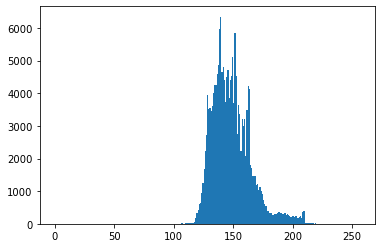

In [8]:
#히스토그램
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread("images/histogram.png", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0,256]); 
plt.show()

# cv2.imshow("src", img_gray)
# cv2.waitKey(0)
    
# cv2.destroyAllWindows() 


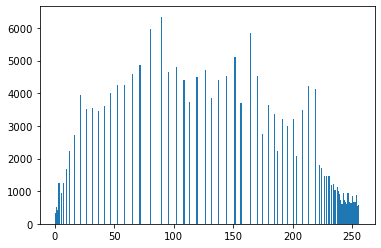

In [ ]:
#히스토그램 이퀄라이제이션
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread("images/histogram.png", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

equ = cv2.equalizeHist(img_gray)
res = np.hstack((img_gray,equ))

plt.hist(equ.ravel(), 256, [0,256]); 
plt.show()

cv2.imshow('src',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
#히스토그램 이퀄라이제이션
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread("images/moon2.jpg", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

equ = cv2.equalizeHist(img_gray)

res = np.hstack((img_gray,equ))
cv2.imshow('src',res)
cv2.waitKey(0)
cv2.destroyAllWindows()